<a href="https://colab.research.google.com/github/Alejandrocg1702/proyecto_2_Alejandro-Cantero/blob/main/kiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
##instalacion silenciosa de missigno
##(no muestra output)
#traduccion, no sale nada y se carga solo a menos que salga error que te dara error, sino ha tragado.

%%capture
!pip install missingno

## Importamos las librerias necesarias para realizar nuestro procesamiento y limpieza de datos.

In [82]:
#Importamos las librerias esenciales
import pandas as pd #Para manejo de datos
import numpy as np #  Para operaciones numericas
import plotly as pl #para visualizaciones interactivas
import seaborn as sns # para graficos estadisticos
import missingno as msno # para visualizar datos faltantes

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cargamos el datased de kiva_loans.csv para trabajar

In [84]:
# Cargamos nuestro dataset principal
df = pd.read_csv('/content/drive/MyDrive/kiva/kiva_loans.csv')

In [85]:
# Aseguramos que sea DataFrame
df = pd.DataFrame(df)

In [86]:
# Echamos un vistazo a las primeras 20 filas o las que quieras, si no pones nada son 5 por defecto.

df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


## Estadistica descriptiva

In [87]:
# Vemos la forma del dataset (filas, columnas)

df.shape

(671205, 20)

In [88]:
# informacion general del dataset
# tipos de datos, nulos, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [89]:
# contamos valores no nulos por columna
df.count()

,0
id,671205
funded_amount,671205
loan_amount,671205
activity,671205
sector,671205
use,666973
country_code,671197
country,671205
region,614405
currency,671205


In [90]:
#estadistica descriptiva de las columnas numericas(float, mean, median, number...)
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [91]:
# Buscamos duplicados
df.duplicated().sum()

np.int64(0)

#¿Hay valores nulos?

In [92]:
# contamos nulos por columna, ordenados de mayor a menor

df.isna().sum().sort_values(ascending=False)

,0
tags,171416
region,56800
funded_time,48331
partner_id,13507
use,4232
borrower_genders,4221
disbursed_time,2396
country_code,8
activity,0
loan_amount,0


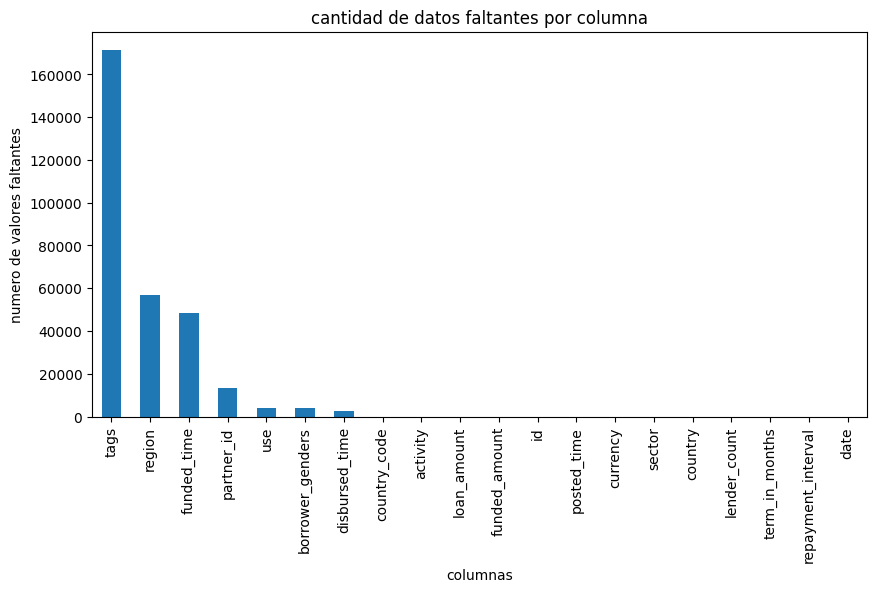

In [93]:
# Verificamos si los nulos superan el 25%

import matplotlib.pyplot as plt

# calcular % de nulos

missing = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(10,5)) # Ancho y alto de la grafica
missing.plot(kind="bar") # tipo de grafico que queramos.
plt.title("cantidad de datos faltantes por columna")
plt.ylabel("numero de valores faltantes")
plt.xlabel("columnas")
plt.show()

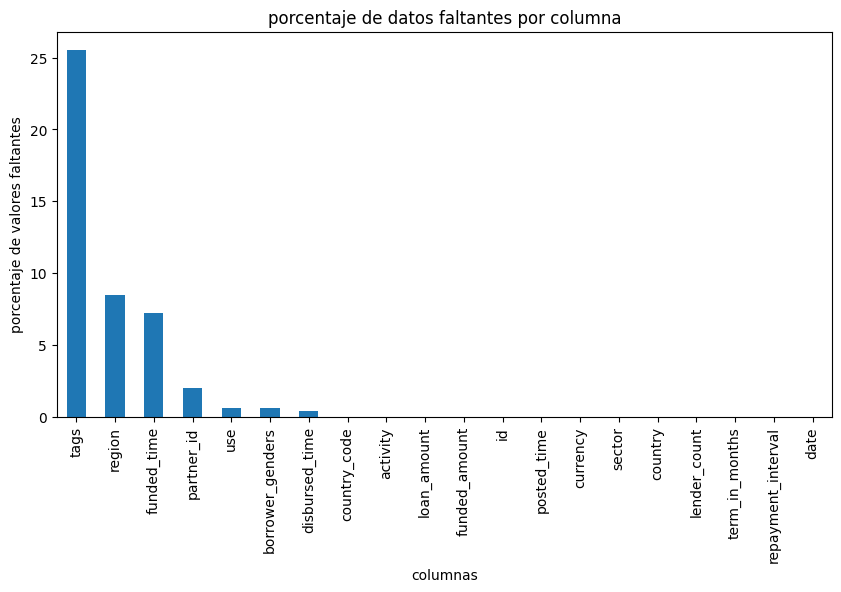

In [94]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)   #igual que el anterior pero te da porcentajes

plt.figure(figsize=(10,5))
missing_pct.plot(kind="bar")
plt.title("porcentaje de datos faltantes por columna")
plt.ylabel("porcentaje de valores faltantes")
plt.xlabel("columnas")
plt.show()

In [95]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)   #igual que el anterior pero te da porcentajes
print(missing_pct)

tags                  25.538546
region                 8.462392
funded_time            7.200632
partner_id             2.012351
use                    0.630508
borrower_genders       0.628869
disbursed_time         0.356970
country_code           0.001192
activity               0.000000
loan_amount            0.000000
funded_amount          0.000000
id                     0.000000
posted_time            0.000000
currency               0.000000
sector                 0.000000
country                0.000000
lender_count           0.000000
term_in_months         0.000000
repayment_interval     0.000000
date                   0.000000
dtype: float64


#la columna tags tiene muchos valores faltantes, deberia borrarla porque no aporta informacion de valor

<Axes: >

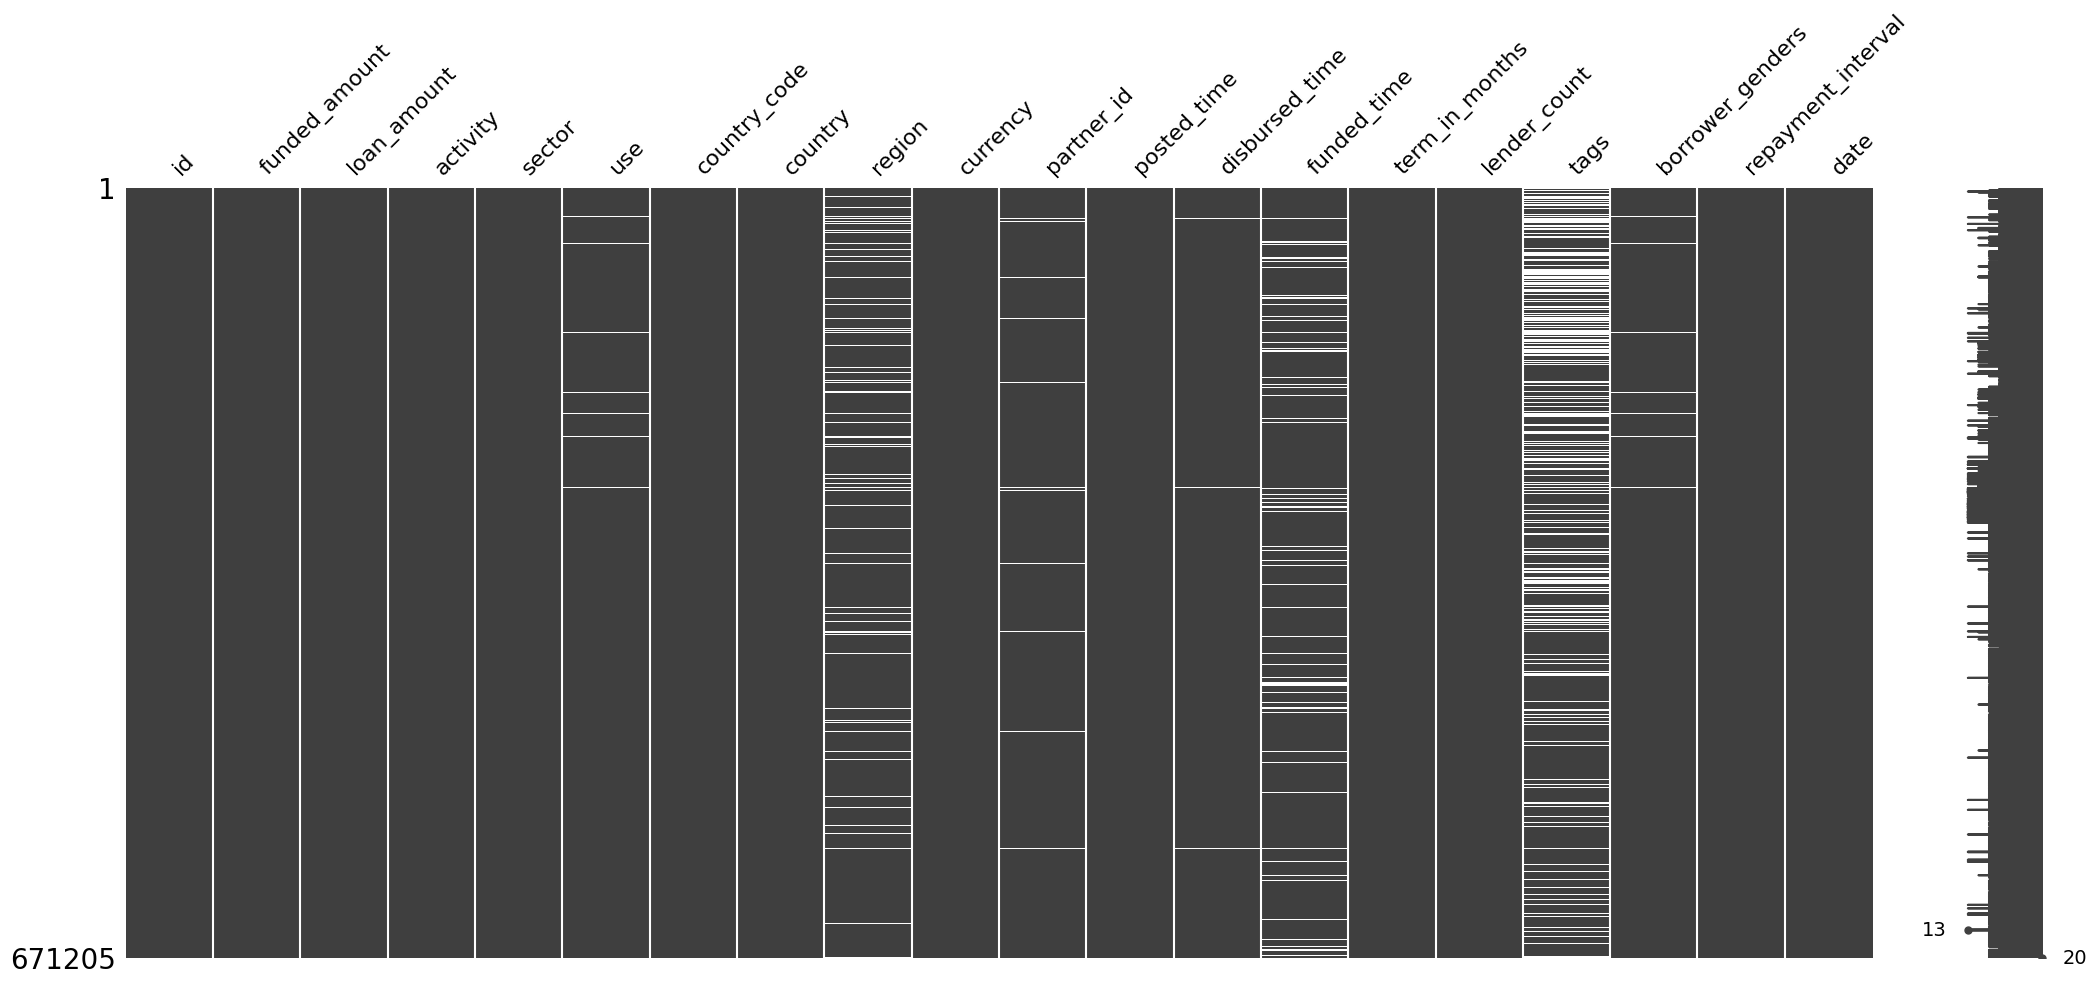

In [96]:
msno.matrix(df) #tiene muchos espacios en blanco son los nulos valores nulo


<Axes: >

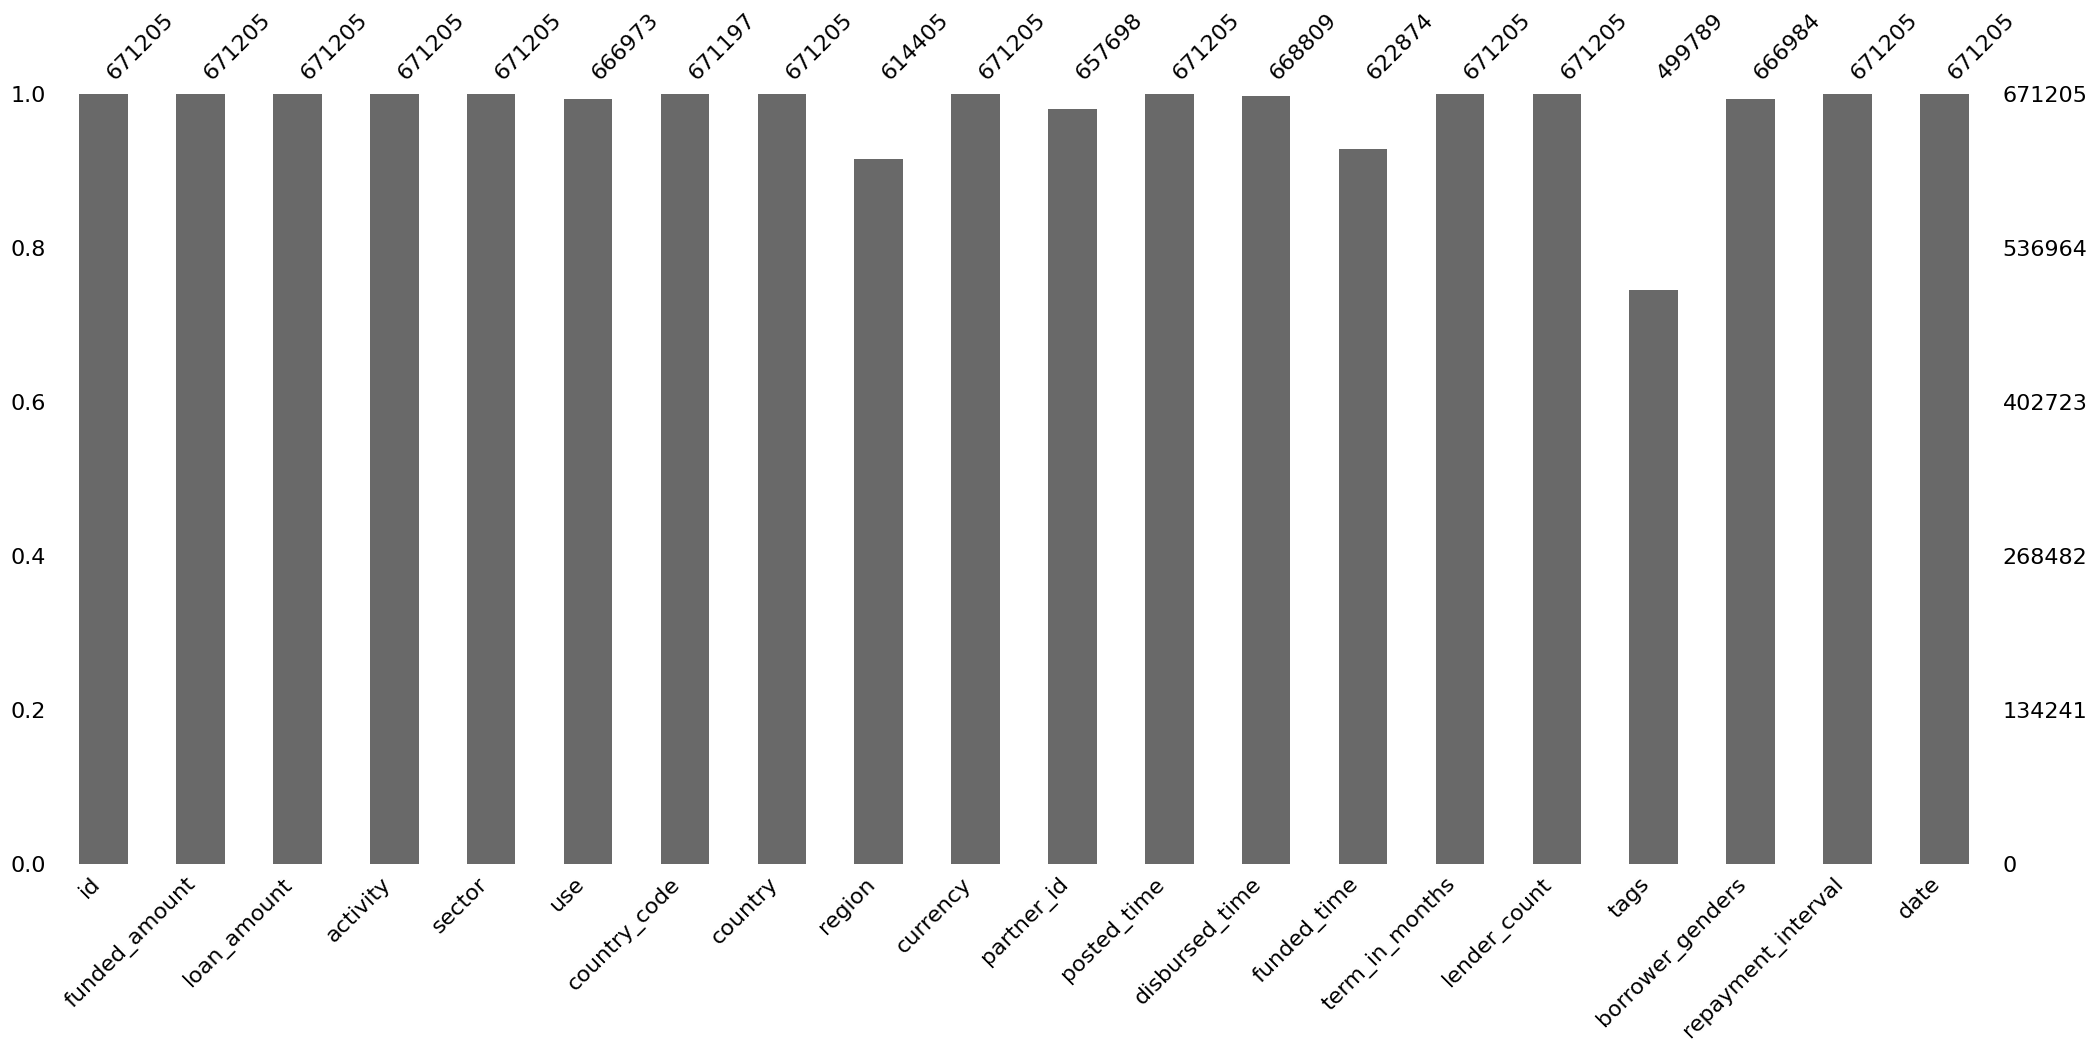

In [97]:
msno.bar(df) #muestra valores no nulos.

In [98]:
kiva_loans_df = df.copy()

## borraremos las columnas que no nos aportan mucha informacion o informacion de valor, en este caso borraremos las columnas partner_id, country_code, tags, borrower_genders y date

In [99]:
#borramos "country_code" porque es redundante ya que hay una columna "country
#borramos "tags " porque al tener tantos valores faltantes no nos aporta informacion
#borramos "partner_ide " porque es una info que no nos provee mucho
#borramos "genders" porque tampoco aporta valor
#borramos "date" ya que nos aporta el mismo valor "posted_time"
#se borra tb "funded_time", "region", "use"

'''
Borramos 'country_code' porque es redundante ya que hay una columna 'country',
Borramos 'tags' porque al tener tantos valores faltantes no nos aporta información de valor,
Borramos 'partnet_id' porque no es una información que nos provea mucho valor,
Borramos 'borrower_genders' porque no es una información que nos provea mucho valor,
Borramos 'date' porque la columna 'posted_time' ya nos devuelve el mismo valor,
'''

cols_to_drop = ["country_code", "partner_id", "tags", "borrower_genders", "date", "funded_time", "region", "use"]
for col in cols_to_drop:
  if col in kiva_loans_df.columns:
    kiva_loans_df = kiva_loans_df.drop(columns=col)


In [100]:
kiva_loans_df.shape

(671205, 12)

In [101]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,PKR,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,PKR,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,INR,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,PKR,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,PKR,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,14.0,16,monthly


In [102]:
kiva_loans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   country             671205 non-null  object 
 6   currency            671205 non-null  object 
 7   posted_time         671205 non-null  object 
 8   disbursed_time      668809 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 61.5+ MB


#tomamos las columnas de fecha y les definimos el tipo de dato "datetime"

In [103]:
#convertir a datetime las fechas
kiva_loans_df["posted_time"] = pd.to_datetime(kiva_loans_df["posted_time"], errors="coerce")
kiva_loans_df["disburse_time"] = pd.to_datetime(kiva_loans_df["disbursed_time"], errors="coerce")

#normalizar la fecha(eliminar la hora, estableciendola en medianoche) mantiendo el tip de dato

kiva_loans_df["posted_time"] = kiva_loans_df["posted_time"].dt.normalize()
kiva_loans_df["disburse_time"] = kiva_loans_df["disburse_time"].dt.normalize()

In [104]:
kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  object             
 4   sector              671205 non-null  object             
 5   country             671205 non-null  object             
 6   currency            671205 non-null  object             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      668809 non-null  object             
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  object             
 12  disburse_time   

## Tomamos las columnas de tipo de dato "object" y les definimos el tipo se dato "string"

In [105]:
for col in kiva_loans_df.columns:
  if kiva_loans_df[col].dtype =="object":
    kiva_loans_df[col] = kiva_loans_df[col].astype("string")

##Verificamos nuevamente el tipo de datos de las columnas

In [106]:
kiva_loans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  string             
 4   sector              671205 non-null  string             
 5   country             671205 non-null  string             
 6   currency            671205 non-null  string             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      668809 non-null  string             
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  string             
 12  disburse_time   

# nos aseguramos que los datos de tipo"string" no tengan estapcios innecesarios y que esten escritas en minusculas

In [107]:
def clean_tex(s):
  return s.astype(str).str.strip().str.lower()

for col in kiva_loans_df.columns:
  if kiva_loans_df[col].dtype == "string":
    kiva_loans_df[col] = clean_tex(kiva_loans_df[col])

#Clasificacion de prestamos segun la fecha de entregarlo

###creamos la columna loan_type para saber si un prestamo fue desembolsado antes o despues de la fecha de publicacion:


*   "pre_disbursed":el prestamo se desembolso antes de publicarse(disbursed_time<posted_time)
*   "post:disbursed": el prestamo se desembolso despues de publicarse (disbursed_time>= posted_time)



In [108]:
kiva_loans_df["loan_type"] = np.where(
    kiva_loans_df["disburse_time"] < kiva_loans_df["posted_time"],
    "pre_disbursed",
    "post_disbursed"
)

In [109]:
kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  object             
 4   sector              671205 non-null  object             
 5   country             671205 non-null  object             
 6   currency            671205 non-null  object             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      671205 non-null  object             
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  object             
 12  disburse_time   

In [110]:
post_disbursed_loans = kiva_loans_df[kiva_loans_df["loan_type"] == "post_disbursed"]

In [111]:
post_disbursed_loans.head()


,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,disburse_time,loan_type
5,1080148,250.0,250.0,services,services,kenya,kes,2014-01-01 00:00:00+00:00,2014-01-30 01:42:48+00:00,4.0,6,irregular,2014-01-30 00:00:00+00:00,post_disbursed
62,653290,4275.0,4275.0,personal housing expenses,housing,vietnam,vnd,2014-01-02 00:00:00+00:00,2014-01-27 08:00:00+00:00,14.0,144,bullet,2014-01-27 00:00:00+00:00,post_disbursed
67,1080150,125.0,125.0,energy,services,kenya,kes,2014-01-02 00:00:00+00:00,2014-01-30 01:42:21+00:00,3.0,6,irregular,2014-01-30 00:00:00+00:00,post_disbursed
99,1080153,5000.0,5000.0,food production/sales,food,united states,usd,2014-01-02 00:00:00+00:00,2014-03-10 22:53:12+00:00,30.0,261,monthly,2014-03-10 00:00:00+00:00,post_disbursed
114,1080151,125.0,125.0,energy,services,kenya,kes,2014-01-02 00:00:00+00:00,2014-01-30 01:42:13+00:00,3.0,7,irregular,2014-01-30 00:00:00+00:00,post_disbursed


#Creamos una nueva columna  "loan_amount" para clasificar si el presatamo es muy pequeño o grande

In [112]:
# obtener min y max reales
min_val = kiva_loans_df["loan_amount"].min()
max_val = kiva_loans_df["loan_amount"].max()

#definir limites segun los rangos
bins = [
    min_val,    #minimo real
    500,
    2500,
    10000,
    max_val     #maximo real
]

labels = ["micro", "small", "medium", "large"]

kiva_loans_df["loan_amount_category"] = pd.cut(kiva_loans_df["loan_amount"], bins=bins, labels=labels, right=False)

#Ver resumen

print(kiva_loans_df["loan_amount_category"].value_counts())
print("min:", min_val, "max:", max_val)






loan_amount_category
micro     330534
small     299111
medium     40144
large       1415
Name: count, dtype: int64
min: 25.0 max: 100000.0


In [113]:
kiva_loans_df.shape

(671205, 15)

In [114]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,disburse_time,loan_type,loan_amount_category
0,653051,300.0,300.0,fruits & vegetables,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 08:00:00+00:00,12.0,12,irregular,2013-12-17 00:00:00+00:00,pre_disbursed,micro
1,653053,575.0,575.0,rickshaw,transportation,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 08:00:00+00:00,11.0,14,irregular,2013-12-17 00:00:00+00:00,pre_disbursed,small
2,653068,150.0,150.0,transportation,transportation,india,inr,2014-01-01 00:00:00+00:00,2013-12-17 08:00:00+00:00,43.0,6,bullet,2013-12-17 00:00:00+00:00,pre_disbursed,micro
3,653063,200.0,200.0,embroidery,arts,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 08:00:00+00:00,11.0,8,irregular,2013-12-24 00:00:00+00:00,pre_disbursed,micro
4,653084,400.0,400.0,milk sales,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 08:00:00+00:00,14.0,16,monthly,2013-12-17 00:00:00+00:00,pre_disbursed,micro


# Visualicemos la intormacion que hemos limpiado

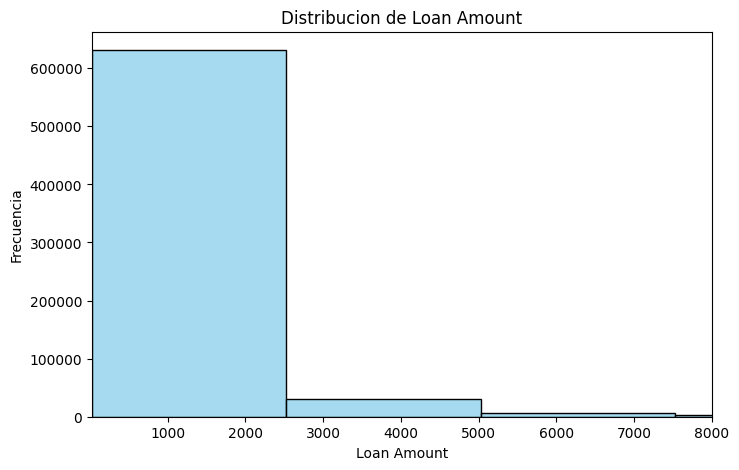

In [115]:
plt.figure(figsize=(8,5))
sns.histplot(kiva_loans_df["loan_amount"], bins=40, kde=False, color="skyblue")
plt.title("Distribucion de Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frecuencia")
plt.xlim(25, 8000)  #para agrandar las barras de la grafica, agrega un rango tambien.
plt.show()

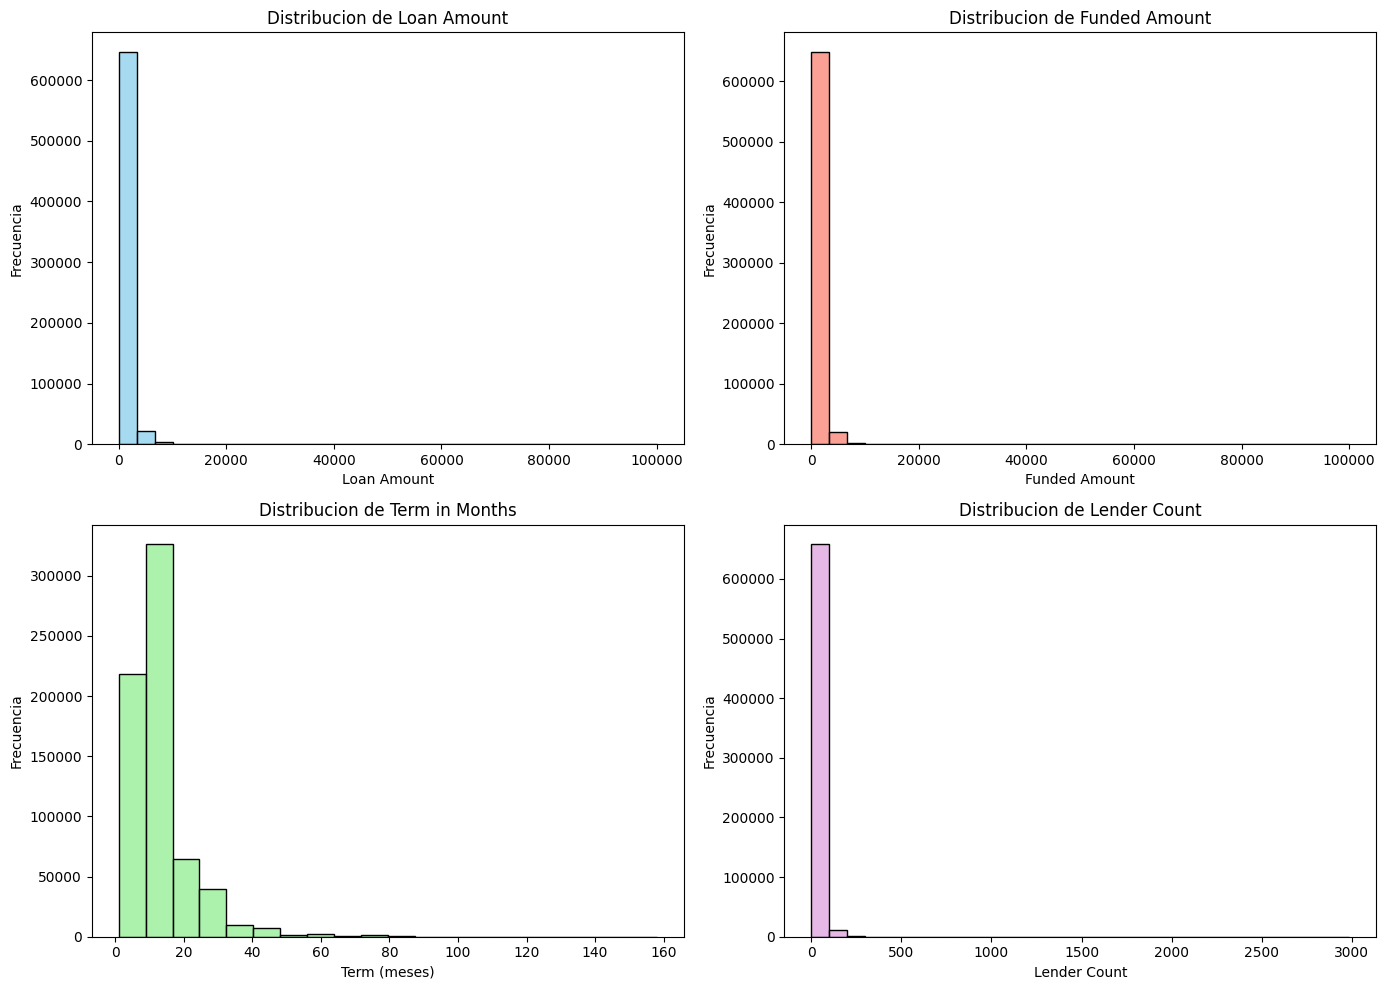

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))  #2 y 2 por fila y el tamaño
axes = axes.flatten()#flatten que se vean compactas

#Loan Amount

sns.histplot(df["loan_amount"], bins=30, kde=False, color="skyblue", ax=axes[0])
axes[0].set_title("Distribucion de Loan Amount")
axes[0].set_xlabel("Loan Amount")
#axes[0].xlim(25,8000)
axes[0].set_ylabel("Frecuencia")

#Funded Amount
sns.histplot(df["funded_amount"], bins=30, kde=False, color="salmon", ax=axes[1]) #kde si lo pones en true, sale lineas
axes[1].set_title("Distribucion de Funded Amount")
axes[1].set_xlabel("Funded Amount")
axes[1].set_ylabel("Frecuencia")

#term in months
sns.histplot(df["term_in_months"], bins=20, kde=False, color="lightgreen", ax=axes[2])
axes[2].set_title("Distribucion de Term in Months")
axes[2].set_xlabel("Term (meses)")
axes[2].set_ylabel("Frecuencia")

# Lender Count
sns.histplot(df["lender_count"], bins=30, kde=False, color="plum", ax=axes[3])
axes[3].set_title("Distribucion de Lender Count")
axes[3].set_xlabel("Lender Count")
axes[3].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()











# GRAFICO DE BARRAS


* Para datos directos como paises, sectores, tipos de loan, etc...




Index(['philippines', 'kenya', 'peru', 'paraguay', 'el salvador',
       'united states', 'cambodia', 'bolivia', 'rwanda', 'ecuador'],
      dtype='object', name='country')
[54476375. 32248405. 30394850. 29412700. 23357725. 23158540. 18817100.
 18276200. 15505600. 14598900.]


/tmp/ipython-input-2337869733.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_totals.index, y=country_totals.values, palette="pastel") #lo que queremos en los ejes y para cambiar los colores


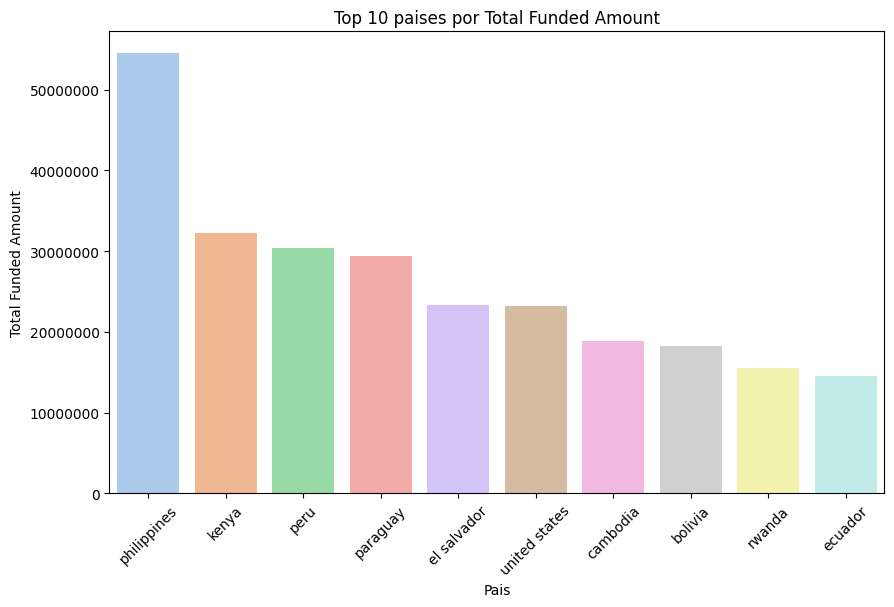

In [117]:
country_totals = kiva_loans_df.groupby("country")["funded_amount"].sum().sort_values(ascending=False).head(10)

print(country_totals.index)
print(country_totals.values)


plt.figure(figsize=(10,6)) #tamaño las figuras
sns.barplot(x=country_totals.index, y=country_totals.values, palette="pastel") #lo que queremos en los ejes y para cambiar los colores
plt.title("Top 10 paises por Total Funded Amount")
plt.xlabel("Pais")
plt.ylabel("Total Funded Amount")
plt.ticklabel_format(style='plain', axis='y') # Add this line to show full numbers on y-axis
plt.xticks(rotation=45)#para poner el nombre recto o con inclinacion
plt.show()

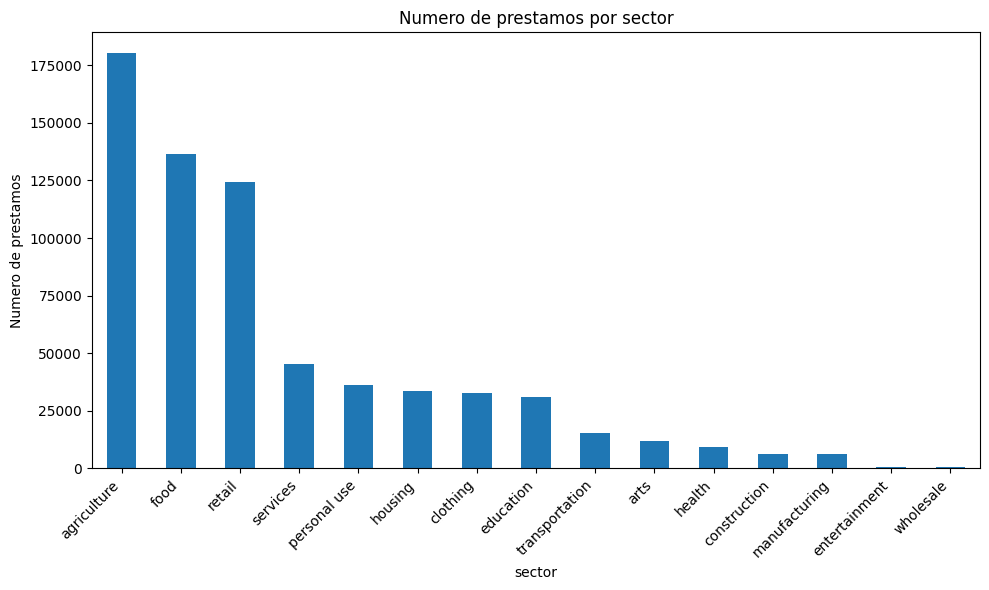

In [118]:
count_by_sector = kiva_loans_df["sector"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6)) #tamaño las figuras
count_by_sector.plot(kind="bar")
plt.title("Numero de prestamos por sector")
plt.xlabel("sector")
plt.ylabel("Numero de prestamos")
plt.xticks(rotation=45, ha="right")#para poner el nombre recto o con inclinacion
plt.tight_layout()
plt.show()

/tmp/ipython-input-2396275333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="loan_type", y="lender_count", data=agg, palette="viridis") #lo que queremos en los ejes y para cambiar los colores


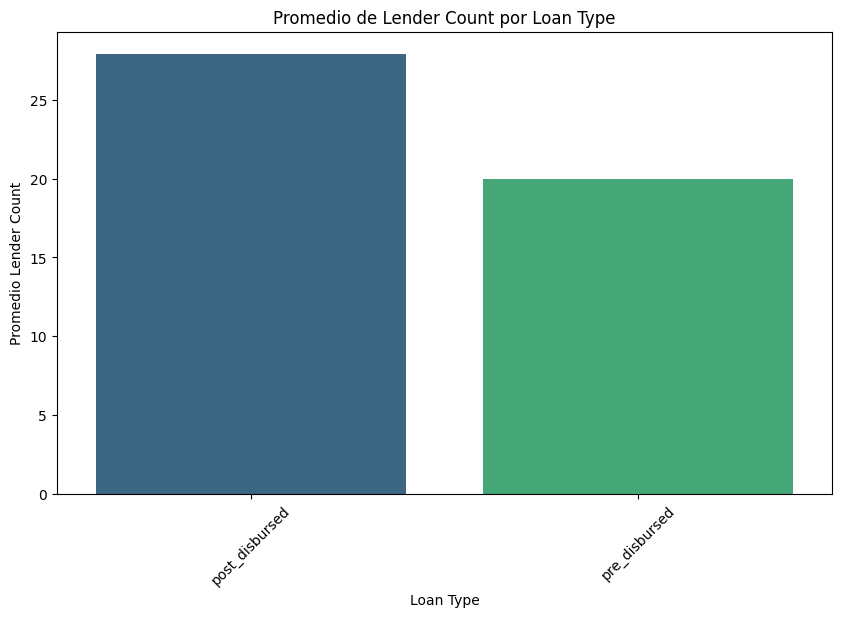

In [119]:
#Agrupar por loan_type y calcular promedio de lender_count(cantidad de gente que dono en cada una de las partes)
agg = kiva_loans_df.groupby("loan_type")["lender_count"].mean().reset_index()

#grafico de barras
plt.figure(figsize=(10,6)) #tamaño las figuras
sns.barplot(x="loan_type", y="lender_count", data=agg, palette="viridis") #lo que queremos en los ejes y para cambiar los colores
plt.title("Promedio de Lender Count por Loan Type")
plt.xlabel("Loan Type")
plt.ylabel("Promedio Lender Count")

plt.xticks(rotation=45)#para poner el nombre recto o con inclinacion

plt.show()

# GRAFICO DE LINEAS:

/tmp/ipython-input-2631731030.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  kiva_loans_df["month"] = kiva_loans_df["posted_time"].dt.to_period("M")


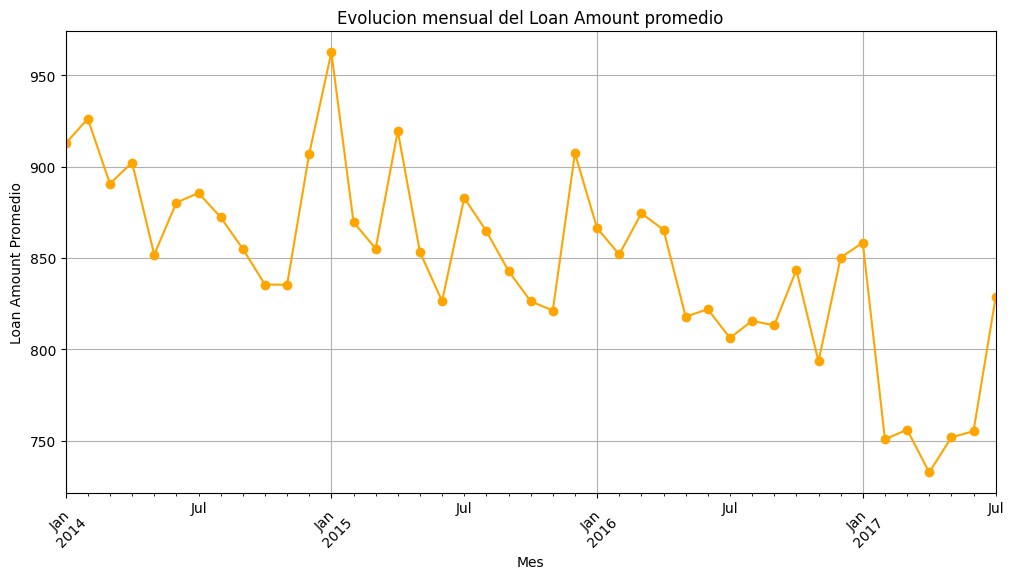

In [120]:
kiva_loans_df["month"] = kiva_loans_df["posted_time"].dt.to_period("M")
monthly_avg = kiva_loans_df.groupby("month")["loan_amount"].mean()

plt.figure(figsize=(12,6)) #tamaño las figuras
monthly_avg.plot(marker="o", color="orange")

plt.title("Evolucion mensual del Loan Amount promedio")
plt.xlabel("Mes")
plt.ylabel("Loan Amount Promedio")

plt.xticks(rotation=45)#para poner el nombre recto o con inclinacion
plt.grid(True)
plt.show()
#es estacional, dependiendo los meses que le pongas


/tmp/ipython-input-2045475059.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kiva_loans_df_line = kiva_loans_df.groupby(pd.Grouper(key="posted_time", freq="M")).agg({"funded_amount": "sum"}).reset_index()


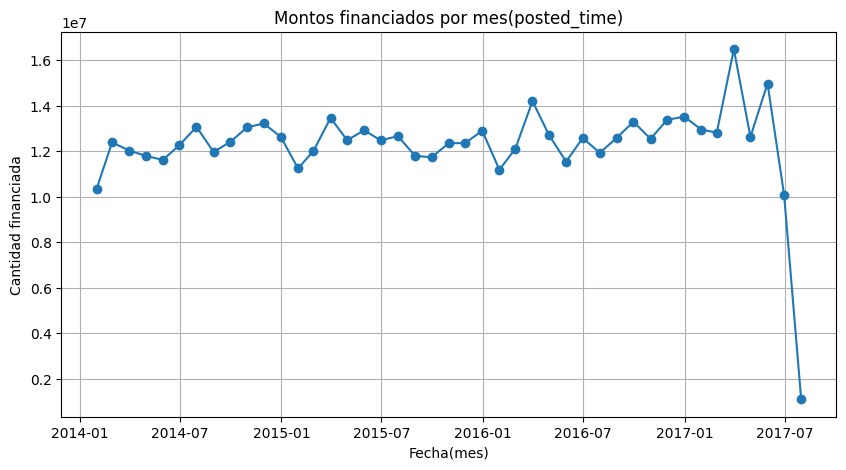

In [121]:
#argurate de que las fechas sean datetime
kiva_loans_df["posted_time"] = pd.to_datetime(kiva_loans_df["posted_time"], errors="coerce")  #esto es si tenemos un dataset sucio o lo empezamos dsd la mitad,nose.
# 1) Grafico de linea temporal
#por ejemplo, montos financiados porfecha de publicacion(podrias agreupar por dias/meses)

kiva_loans_df_line = kiva_loans_df.groupby(pd.Grouper(key="posted_time", freq="M")).agg({"funded_amount": "sum"}).reset_index()

plt.figure(figsize=(10,5))
plt.plot(kiva_loans_df_line["posted_time"], kiva_loans_df_line["funded_amount"], marker="o")

plt.title("Montos financiados por mes(posted_time)")
plt.xlabel("Fecha(mes)")
plt.ylabel("Cantidad financiada")



plt.grid(True)
plt.show()


# Pie Chart


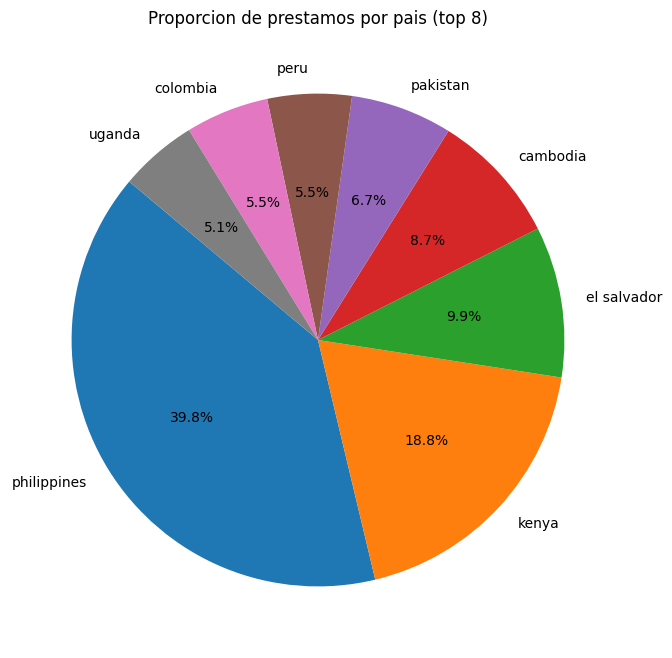

In [122]:
top_countries = kiva_loans_df["country"].value_counts().nlargest(8)
plt.figure(figsize=(8,8))
plt.pie(top_countries, labels=top_countries.index, autopct="%1.1f%%", startangle=140)
plt.title("Proporcion de prestamos por pais (top 8)")
plt.show()

#Choropleth map

In [123]:
%%capture
!pip install geodatasets

In [124]:
import geopandas as gpd
import geodatasets
import os
import requests
import zipfile

In [125]:
pd.set_option("display.max_columns", None)
# pd.reset_option("display.max_columns")


##La extension .shp es la parte principal de un Shapefile, un formato de datos de Geoinformatica (GIS) popular que alacena la geometria de elementos geograficos como puntos lineas y poligonos.

In [126]:
# para descargar este archivo zip, nos dirtigimos a en escritorio esta la foto de descarga drive colab
world = gpd.read_file("ne_110m_admin_0_countries.shp")
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [127]:
world["NAME"]

,NAME
0,Fiji
1,Tanzania
2,W. Sahara
3,Canada
4,United States of America
...,...
172,Serbia
173,Montenegro
174,Kosovo
175,Trinidad and Tobago


In [128]:
kiva_loans_df["country"]

,country
0,pakistan
1,pakistan
2,india
3,pakistan
4,pakistan
...,...
671200,paraguay
671201,kenya
671202,kenya
671203,kenya


In [129]:
kiva_loans_df = df.copy()

# Drop columns (from k1ZHckRiRIul)
cols_to_drop = ["country_code", "partner_id", "tags", "borrower_genders", "date", "funded_time", "region", "use"]
for col in cols_to_drop:
  if col in kiva_loans_df.columns:
    kiva_loans_df = kiva_loans_df.drop(columns=col)

# Convert date columns (from jVEY0cI9bRO1)
kiva_loans_df["posted_time"] = pd.to_datetime(kiva_loans_df["posted_time"], errors="coerce")
kiva_loans_df["disburse_time"] = pd.to_datetime(kiva_loans_df["disbursed_time"], errors="coerce")
kiva_loans_df["posted_time"] = kiva_loans_df["posted_time"].dt.normalize()
kiva_loans_df["disburse_time"] = kiva_loans_df["disburse_time"].dt.normalize()

# Convert object columns to string (from i2jDJh0Uead4)
for col in kiva_loans_df.columns:
  if kiva_loans_df[col].dtype =="object":
    kiva_loans_df[col] = kiva_loans_df[col].astype("string")

# Clean text (from tVIpPkw2esB9)
def clean_tex(s):
  return s.astype(str).str.strip().str.lower()

for col in kiva_loans_df.columns:
  if kiva_loans_df[col].dtype == "string":
    kiva_loans_df[col] = clean_tex(kiva_loans_df[col])

# Create loan_type (from wLdiBnY4fqMO)
kiva_loans_df["loan_type"] = np.where(
    kiva_loans_df["disburse_time"] < kiva_loans_df["posted_time"],
    "pre_disbursed",
    "post_disbursed"
)

# Create loan_amount_category (from VUWZVi_Si4HW)
min_val = kiva_loans_df["loan_amount"].min()
max_val = kiva_loans_df["loan_amount"].max()
bins = [
    min_val,
    500,
    2500,
    10000,
    max_val
]
labels = ["micro", "small", "medium", "large"]
kiva_loans_df["loan_amount_category"] = pd.cut(kiva_loans_df["loan_amount"], bins=bins, labels=labels, right=False)

# Create month column (from vFdCIwjKARlC)
kiva_loans_df["month"] = kiva_loans_df["posted_time"].dt.to_period("M")

# Ensure posted_time is datetime again (from jZOUF6AVCNaK, for consistency if kernel restarts)
kiva_loans_df["posted_time"] = pd.to_datetime(kiva_loans_df["posted_time"], errors="coerce")


kiva_loans_df["country"]

/tmp/ipython-input-2929101691.py:49: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  kiva_loans_df["month"] = kiva_loans_df["posted_time"].dt.to_period("M")


,country
0,pakistan
1,pakistan
2,india
3,pakistan
4,pakistan
...,...
671200,paraguay
671201,kenya
671202,kenya
671203,kenya


## Verificamos que el formato de world["NAME"] y kiva_loans_df["country"] sea el mismo

In [130]:
kiva_loans_df["country"] = kiva_loans_df["country"].astype(str).str.title().str.strip()
world["NAME"] = world["NAME"].astype(str).str.title().str.strip()

In [131]:
kiva_loans_df["country"]

,country
0,Pakistan
1,Pakistan
2,India
3,Pakistan
4,Pakistan
...,...
671200,Paraguay
671201,Kenya
671202,Kenya
671203,Kenya


In [132]:
country_stats = kiva_loans_df.groupby("country", as_index=False)["loan_amount"].sum()
country_stats = country_stats.rename(columns={"loan_amount": "total_loan"})
print(country_stats.index)
print(country_stats.head())

RangeIndex(start=0, stop=87, step=1)
       country  total_loan
0  Afghanistan     14000.0
1      Albania   2666500.0
2      Armenia  12915400.0
3   Azerbaijan   2888700.0
4       Belize    114025.0


## Hacemos un left join, al dataframe world se le agrega la info del dataframe country_stats cuando coinciden, si hay un pais que no existe entonces se marca como NaN

In [133]:
merged = world.merge(country_stats, left_on="NAME", right_on="country", how="left")

<Figure size 2000x2000 with 0 Axes>

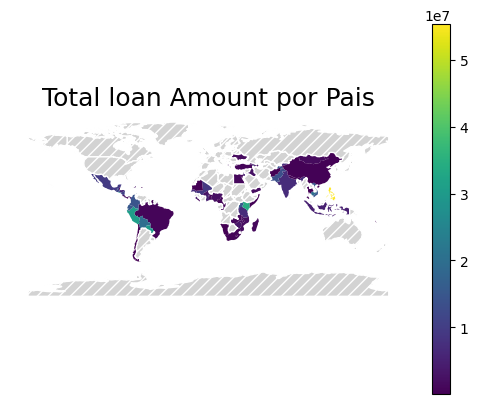

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
merged.plot(
    column="total_loan",
    cmap="viridis",
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data"
    }
)

plt.title("Total loan Amount por Pais", fontsize=18)
plt.axis("off")
plt.show()


In [135]:
import folium

In [136]:
m = folium.Map(location=[20, 0], zoom_start=2)

#agregar capa GeoJson con informacion por pais
folium.GeoJson(
    merged,
    style_function=lambda feature: {
        "fillColor": "#gray" if feature["properties"]["total_loan"] is None else "#3186cc",
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.6,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=["NAME", "total_loan"],
        aliases=["Pais: ", "Total Loan: "],
        localize=True, #define las fonteras y muestra los valores

        sticky=True, #te pones encima del pais y sale info
    )
).add_to(m)

# vemos el mapa
m

##Verificamos la existencia de outliers (valores atipicos), respecto a las columnas funded_amount y loan_amount

###Regla de Tukey: La Regla de Tukey es una forma sencilla de detectar valores atipicos (outliers) usando cuartiles(1/4). la idea es ver que tan lejos estan los datos de la parte "normal" del conjunto.

*   Q1 = valor donde termina el 25% mas bajo de los datos
*   Q3 = valor donde termina el 75% de los datos
*   IQR = Q3 - Q1 --> mide la zona donde vive la mitad central de los datos

Un dato se considera outlier si esta demasiado lejos de esa zona:
  
*   Limite inferior= Q1 - 1,5 x IQR
*   Limite Superior = Q3 + 1.5 xIQR

Todo lo que quede fuera de ese rango se marca como valor atipico.

** Quien fue Tukey?
John Tukey fue un estadistico estadounidense y pionero en analisis y exploracion de datos. Es conocido por inventar el boxplot y acuñar el termino bit en informatica.











In [137]:
kiva_loans_df["loan_amount_category"].value_counts()


,count
loan_amount_category,
micro,330534
small,299111
medium,40144
large,1415


In [138]:
categories = ["micro", "small", "medium", "large"]

for cat in categories:
  df_cat = kiva_loans_df[kiva_loans_df["loan_amount_category"] == cat]

  if df_cat.empty:
    print(f"\n{cat}: (sin datos)")
    continue


  q1 = df_cat["loan_amount"].quantile(0.25)
  q3 = df_cat["loan_amount"].quantile(0.75)
  iqr = q3 - q1

  # Limites para detectar outliers

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # filtrar outliers
  outliers = df_cat[(df_cat["loan_amount"] < lower_bound) | (df_cat["loan_amount"] > upper_bound)]
  n_outliers = len(outliers)

  print(f"\n{cat}:")
  print(f"  Q1: {q1}")
  print(f"  Q3: {q3}")
  print(f"  IQR: {iqr}")
  print(f"  Outliers: {n_outliers}")



micro:
  Q1: 200.0
  Q3: 350.0
  IQR: 150.0
  Outliers: 0

small:
  Q1: 625.0
  Q3: 1200.0
  IQR: 575.0
  Outliers: 10204

medium:
  Q1: 3000.0
  Q3: 5000.0
  IQR: 2000.0
  Outliers: 797

large:
  Q1: 10000.0
  Q3: 10000.0
  IQR: 0.0
  Outliers: 183


In [139]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,disburse_time,loan_type,loan_amount_category,month
0,653051,300.0,300.0,fruits & vegetables,food,Pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 08:00:00+00:00,12.0,12,irregular,2013-12-17 00:00:00+00:00,pre_disbursed,micro,2014-01
1,653053,575.0,575.0,rickshaw,transportation,Pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 08:00:00+00:00,11.0,14,irregular,2013-12-17 00:00:00+00:00,pre_disbursed,small,2014-01
2,653068,150.0,150.0,transportation,transportation,India,inr,2014-01-01 00:00:00+00:00,2013-12-17 08:00:00+00:00,43.0,6,bullet,2013-12-17 00:00:00+00:00,pre_disbursed,micro,2014-01
3,653063,200.0,200.0,embroidery,arts,Pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 08:00:00+00:00,11.0,8,irregular,2013-12-24 00:00:00+00:00,pre_disbursed,micro,2014-01
4,653084,400.0,400.0,milk sales,food,Pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 08:00:00+00:00,14.0,16,monthly,2013-12-17 00:00:00+00:00,pre_disbursed,micro,2014-01


##Grafico de densidad


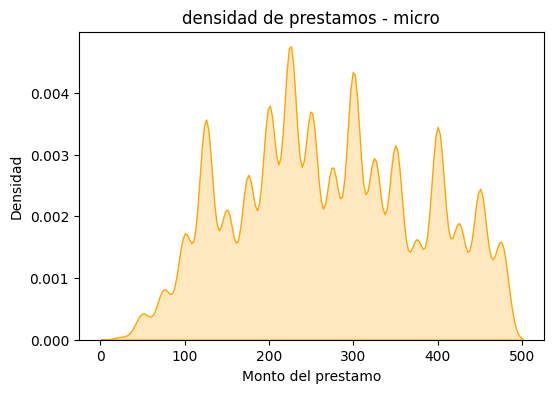

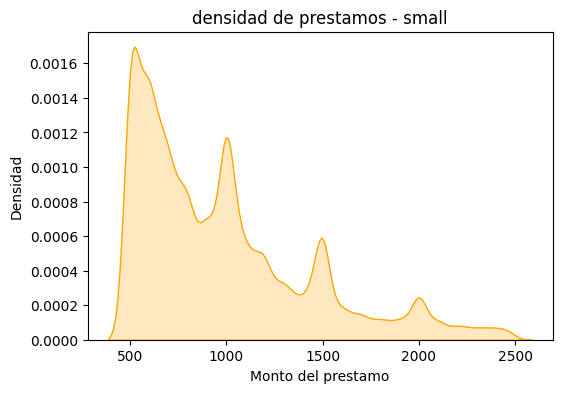

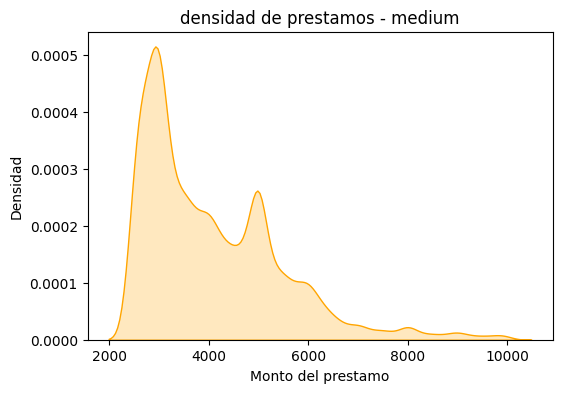

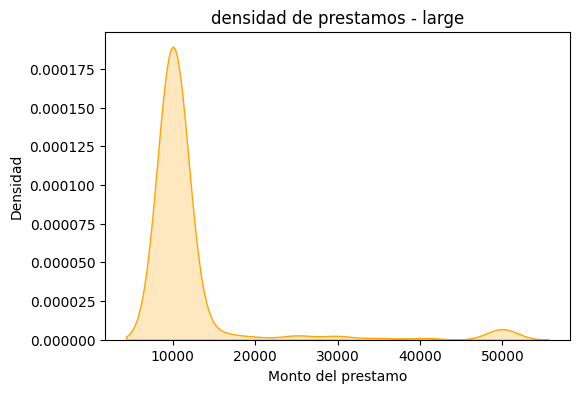

In [140]:
import seaborn as sns

for cat in labels:
  subset = kiva_loans_df[kiva_loans_df["loan_amount_category"] == cat]
  plt.figure(figsize=(6,4))
  sns.kdeplot(subset["loan_amount"], fill=True, color="orange")
  plt.title(f"densidad de prestamos - {cat}")
  plt.xlabel("Monto del prestamo")
  plt.ylabel("Densidad")
  plt.show()

In [145]:
folder ="/content/drive/MyDrive/kiva_loans"
os.makedirs(folder, exist_ok=True)
kiva_loans_df.to_csv(f"{folder}/df_clean.csv", index=false)

NameError: name 'false' is not defined

In [ ]:
1